In this section, we employ hyperparameters to enhance performance. The optimizer is capable of selecting optimal values from the defined hyperparameter space to achieve improved results.

In the first four steps, no hyperparameter tuning was applied; these steps were reused from our previous implementation.

In [1]:
# Step 1 : Importing the necessary libraries

import tensorflow as tf  # tf is a powerful tool to build, train and evaluate the NN
from tensorflow.keras import datasets, layers, models # Keras, high Level API which makes it easier to build and train the DL Models
import matplotlib.pyplot as plt # visualization for the results

2025-07-14 16:12:13.711035: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-14 16:12:13.714079: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-14 16:12:13.723353: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752502333.738483   29137 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752502333.742765   29137 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752502333.754351   29137 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
# Step 2 : Loading and pre-processing the CIFAR-10 dataset
(train_images, train_labels),(test_images, test_labels) = datasets.cifar10.load_data()

In [3]:
# Step 3 : Normalising pixel values to be between 0 and 1
train_images = train_images/255.0
test_images =  test_images/255.0 

In [4]:
# Step 4 : Defining the class names for CIFAR-10 images
class_name = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'] # in CIFAR-10 Datasets there are 10 different classes/labels

In [5]:
# Step 5 : Import the keras_tuner library for hyperparameter tuning
%pip install keras_tuner # Install keras_tuner for hyperparameter tuning
from keras_tuner.tuners import RandomSearch # Import RandomSearch for hyperparameter tuning


Note: you may need to restart the kernel to use updated packages.


In [6]:
# Step 6 :Define a function to build the model
def build_model(hp):
    model = models.Sequential()
    model.add(layers.Conv2D(hp.Int('conv1_units',min_value = 32, max_value = 128,step = 16 ),(3,3),activation = 'relu',input_shape=(32,32,3))) # Add a convolutional layer with hyperparameter for number of filters'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(hp.Int('conv2_units',min_value = 32, max_value = 128,step = 16),(3,3),activation = 'relu')) # Add another convolutional layer with hyperparameter for number of filters
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(hp.Int('conv3_units',min_value = 32, max_value = 128,step = 16),(3,3),activation = 'relu')) # Add another convolutional layer with hyperparameter for number of filters
    model.add(layers.Flatten())
    model.add(layers.Dense(hp.Int('dense_units', min_value = 32, max_value = 128, step = 16), activation ='relu')) # Add a dense layer with hyperparameter for number of units
    model.add(layers.Dropout(hp.Float('dropout_rate',min_value = 0.0, max_value = 0.5, step = 0.1))) # Add a dropout layer with hyperparameter for dropout rate
    model.add(layers.Dense(10)) # Add the output layer with 10 units for 10 classes

    #Choose an optimizer and learning rate
    optimizer = tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate',values=[1e-2,1e-3,1e-4])) # Add a hyperparameter for learning rate

    model.compile(optimizer=optimizer,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy']) # Compile the model with Sparse Categorical Crossentropy loss and accuracy metric
    return model # Return the compiled model

In [7]:
# Step 7 : Create a RandomSearch tuner to search for the best hyperparameters
tuner = RandomSearch(
    build_model, # The function to build the model
    objective = 'val_accuracy', # The objective to optimize
    max_trials = 10, # The maximum number of trials to run
    executions_per_trial = 1, # The number of executions per trial
    directory = 'hyperparameter_tuning', # The directory to save the results
    project_name = 'cifar10_tuning' # The name of the project
)

E0000 00:00:1752502338.477697   29137 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1752502338.478144   29137 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/cakir/Deep_Learning_Project/Deep-Learning-Project/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Step 8 : Perform hyperparameter tuning
tuner.search(train_images,train_labels,epochs=10, # Train the model for 10 epochs
             validation_data=(test_images,test_labels)) # Use the test set for validation during tuning


Trial 10 Complete [00h 06m 51s]
val_accuracy: 0.10000000149011612

Best val_accuracy So Far: 0.7275999784469604
Total elapsed time: 00h 43m 48s


In [9]:
# Step 9 : Get the best Hyperparameters

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0] # Get the best hyperparameters from the tuning process

In [10]:
# Step 10 : Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_images, train_labels, epochs=10, # Train the model for 10 epochs
                    validation_data=(test_images, test_labels)) # Use the test set for validation during training

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.3684 - loss: 1.7081 - val_accuracy: 0.5852 - val_loss: 1.1725
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.6041 - loss: 1.1196 - val_accuracy: 0.6562 - val_loss: 0.9782
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.6758 - loss: 0.9297 - val_accuracy: 0.6834 - val_loss: 0.9196
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.7118 - loss: 0.8240 - val_accuracy: 0.7019 - val_loss: 0.8611
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.7472 - loss: 0.7288 - val_accuracy: 0.7100 - val_loss: 0.8350
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.7739 - loss: 0.6470 - val_accuracy: 0.7017 - val_loss: 0.8925
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.7883 - loss: 0.5983 - val_accuracy: 0.7168 - val_loss: 0.8757
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.8116 -

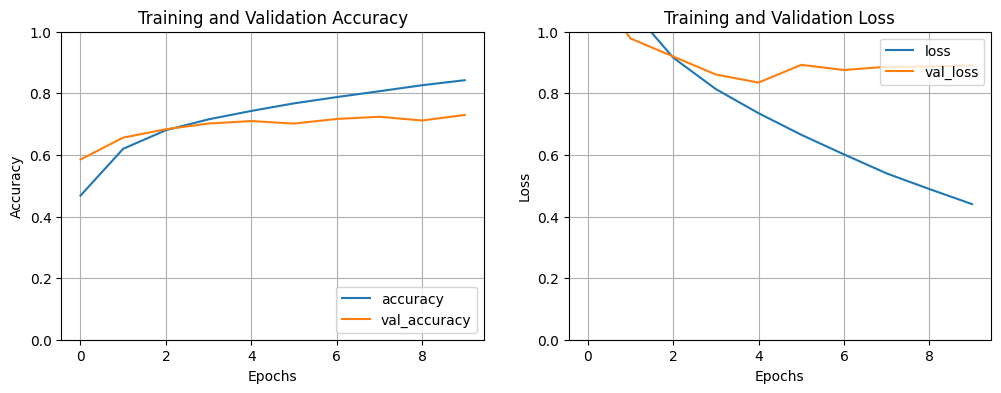

In [11]:
# Step 11 : Plotting the training and validation accuracy and loss values
plt.figure(figsize=(12,4)) # Create a figure with a specified size

plt.subplot(1,2,1) # Create a subplot for accuracy
plt.plot(history.history['accuracy'],label = 'accuracy') # Plot training accuracy
plt.plot(history.history['val_accuracy'],label = 'val_accuracy') # Plot validation accuracy
plt.xlabel('Epochs') # Set x-axis label
plt.ylabel('Accuracy') # Set y-axis label
plt.ylim([0,1]) # Set y-axis limits
plt.legend(loc = 'lower right') # Add legend to the plot
plt.title('Training and Validation Accuracy') # Set title for the accuracy plot
plt.grid() # Add grid lines to the accuracy plot

plt.subplot(1,2,2) # Create a subplot for loss
plt.plot(history.history['loss'],label = 'loss') # Plot training loss
plt.plot(history.history['val_loss'],label = 'val_loss') # Plot validation loss
plt.xlabel('Epochs') # Set x-axis label
plt.ylabel('Loss') # Set y-axis label
plt.ylim([0,1]) # Set y-axis limits
plt.legend(loc = 'upper right') # Add legend to the plot
plt.title('Training and Validation Loss') # Set title for the loss plot
plt.grid() # Add grid lines to the loss plot

plt.show() # Show the plots for accuracy and loss